In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
loans = pd.read_csv(r'C:\Users\Richa\Desktop\Predicting_loan_repayment\Data\loan_data.csv')

<h4>Pre Processing

In [ ]:
from sklearn import preprocessing

In [15]:
#creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
purpose_encoded=le.fit_transform(loans['purpose'])
print ("Purpose Encoded:" ,purpose_encoded) 

Purpose Encoded: [2 1 2 ... 2 4 2]


In [16]:
loans['purpose_encoded'] = purpose_encoded

In [17]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_encoded
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,2
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,2
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,2
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1


In [18]:
#Checking duplicate rows

loans.duplicated(subset = None, keep = 'first')

0       False
1       False
2       False
3       False
4       False
        ...  
9573    False
9574    False
9575    False
9576    False
9577    False
Length: 9578, dtype: bool

In [19]:
#Checking missing values

loans.isnull()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_encoded
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9574,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9575,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9576,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [20]:
#Data arranged in descending order of the fico score

loans.sort_values(['fico'], axis=0,ascending=False,inplace=True)
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_encoded
1613,1,home_improvement,0.1051,390.09,11.918391,2.92,827,8763.000000,84236,4.6,0,0,0,0,4
2476,1,small_business,0.0800,203.69,10.819778,3.24,822,7260.000000,35624,2.5,0,0,0,0,6
154,1,small_business,0.0901,795.11,10.950807,8.93,822,9696.958333,185,0.5,0,0,0,0,6
1477,1,all_other,0.0800,344.71,10.691945,1.94,822,11579.958330,3879,7.9,2,0,0,0,0
2495,1,debt_consolidation,0.0740,155.30,11.359774,7.92,822,11261.000000,1874,5.5,0,0,0,0,2


                   credit.policy  int.rate  installment  log.annual.inc  \
credit.policy           1.000000 -0.294089     0.058770        0.034906   
int.rate               -0.294089  1.000000     0.276140        0.056383   
installment             0.058770  0.276140     1.000000        0.448102   
log.annual.inc          0.034906  0.056383     0.448102        1.000000   
dti                    -0.090901  0.220006     0.050202       -0.054065   
fico                    0.348319 -0.714821     0.086039        0.114576   
days.with.cr.line       0.099026 -0.124022     0.183297        0.336896   
revol.bal              -0.187518  0.092527     0.233625        0.372140   
revol.util             -0.104095  0.464837     0.081356        0.054881   
inq.last.6mths         -0.535511  0.202780    -0.010419        0.029171   
delinq.2yrs            -0.076318  0.156079    -0.004368        0.029203   
pub.rec                -0.054243  0.098162    -0.032760        0.016506   
not.fully.paid         -0

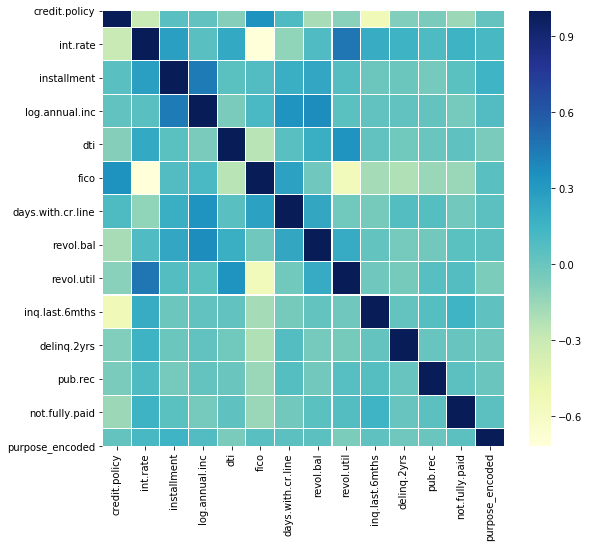

In [21]:
#Correlation Matrix

corrmat1 = loans.corr() 

print(corrmat1)
  
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat1, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

In [22]:
# Feature matrix in a object named X
features = ['credit.policy','int.rate','installment','log.annual.inc','dti','fico','days.with.cr.line','revol.bal','revol.util','inq.last.6mths','delinq.2yrs','pub.rec','purpose_encoded']
X = loans[features]

# Response vector in a object named y
target = ['not.fully.paid']
y = loans[target]

In [23]:
print(X.shape)
print(y.shape)

(9578, 13)
(9578, 1)


In [24]:
# splitting the data into training and test sets (70:30)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, train_size = 0.7)

In [25]:
#shape of train and test objects
print(X_train.shape)
print(X_test.shape)

(6704, 13)
(2874, 13)


In [26]:
# shape of new y objects
print(y_train.shape)
print(y_test.shape)

(6704, 1)
(2874, 1)
